In [29]:
from __future__ import division
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import scipy.io

In [30]:
# Load Measurement matrix from file
A = np.loadtxt(open("Measurementmatrix10102020.txt", 'rb'), delimiter=",", skiprows=0)
print(A)
A.shape

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


(29, 87)

In [32]:
MeanSpeedReduction = np.array([np.loadtxt(open("ExitPhenotype11182021.txt", 'rb'), delimiter=",", skiprows=0)])
MeanSpeedReduction = np.transpose(MeanSpeedReduction)
MeanSpeedReduction.shape



(29, 1)

In [33]:
MeanSpeedReductionError = np.array([np.loadtxt(open("ExitPhenotype11182021error.txt", 'rb'), delimiter=",", skiprows=0)])
MeanSpeedReductionError = np.transpose(MeanSpeedReductionError)
MeanSpeedReductionError.shape

(29, 1)

In [34]:
# Phenotype Vector
ymean = MeanSpeedReduction
ystd  = MeanSpeedReductionError
Neurons = np.genfromtxt('Uniqueneuronnames.txt',dtype='str')
Neurons

array(['ADA', 'ADE', 'ADF', 'ADL', 'AIA', 'AIM', 'AIN', 'AIY', 'AIZ',
       'ALA', 'ALN', 'ASE', 'ASG', 'ASH', 'ASI', 'ASJ', 'ASK', 'AUA',
       'AVA', 'AVB', 'AVD', 'AVE', 'AVG', 'AVH', 'AVJ', 'AVK', 'AVL',
       'AWA', 'AWC', 'BAG', 'BDU', 'CAN', 'CEP', 'DD1', 'DVA', 'DVB',
       'DVC', 'FLP', 'HSN', 'I2', 'I5', 'I6', 'IL1', 'LUA', 'M2', 'M4',
       'MC', 'MI', 'NSM', 'OLL', 'OLQ', 'PDA', 'PHA', 'PHB', 'PHC', 'PLN',
       'PQR', 'PVC', 'PVD', 'PVN', 'PVQ', 'PVR', 'PVT', 'PVW', 'RIA',
       'RIB', 'RIC', 'RID', 'RIG', 'RIM', 'RIP', 'RIV', 'RMD', 'RME',
       'RMF', 'RMG', 'RMH', 'SAA', 'SAB', 'SDQ', 'SIA', 'SIB', 'SMB',
       'SMD', 'URA', 'URB', 'URX'], dtype='<U3')

In [35]:
# Continuous phenotype vector - bootstraping with 10000 solution
# may take few minutes
LX10k=np.zeros((50,10000,87))
L1norm10k=np.zeros((50,10000))
L2norm10k=np.zeros((50,10000))
y10kStored = np.zeros((50,10000))

As=np.logspace(-4,1.5,num=50) #Sparsity parameters
count=0
for a in As:
    ytemp=np.zeros((29,1));
    X=np.zeros((10000,87));
    for i in range(0,10000):
        ytemp = ymean + ystd * np.random.randn(29,1)
        clf = Lasso(alpha=a,max_iter=20000) #Lasso model
        clf.fit(A, ytemp)                  #Fit Lasso model using our measurement matrisx and phenotype vector
        X[i,:] = clf.coef_
        L1norm10k[count,i] = np.sum(np.abs(X[i,:]))
        L2norm10k[count,i] = np.sum((np.dot(A,X[i,:])[np.newaxis, :].T-ytemp)**2)
        y10kStored = ytemp
    LX10k[count,:,:]=X
    count=count+1

In [36]:
# write data with cPickle
pickle.dump( LX10k, open( "Lasso10kSolutionsReentry.pkl", "wb" ) )

In [37]:
# 10k Solution Averages
L1norm10kMean = np.mean(L1norm10k,axis=1)
L2norm10kMean = np.mean(L2norm10k,axis=1)
L1norm10kStd = np.std(L1norm10k,axis=1)
L2norm10kStd = np.std(L2norm10k,axis=1)

XlamMean10k = np.zeros((50,87))
XlamStd10k = np.zeros((50,87))
XlamMedian10k = np.zeros((50,87))
for lam in range(0,50):
    XlamMean10k[lam,:]=np.mean(LX10k[lam],axis=0)
    XlamMedian10k[lam,:]=np.median(LX10k[lam],axis=0)
    XlamStd10k[lam,:]=np.std(LX10k[lam],axis=0)

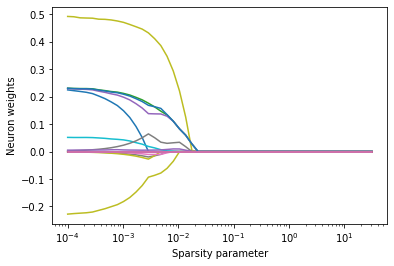

In [38]:
#PLOTTING - Neuron weights
for i in range(0,87):
        plt.plot(As,XlamMedian10k[:,i])
        plt.xscale('log')
        plt.xlabel('Sparsity parameter')
        plt.ylabel('Neuron weights')
        if abs(XlamMedian10k[lam,i])>2:
            if i==10:
                plt.text(As[lam+2],XlamMedian10k[lam,i]+2,Neurons[i])
            else:
                plt.text(As[lam],XlamMedian10k[lam,i],Neurons[i])
plt.show()

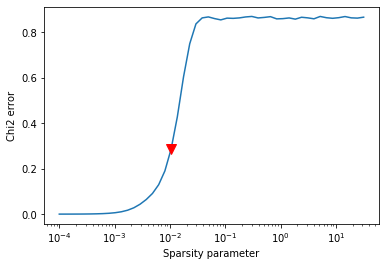

In [46]:
#PLOTTING - Chi2 error
lam =18
plt.plot(As,L2norm10kMean)
plt.plot(As[lam],L2norm10kMean[lam],'rv',ms=10,fillstyle='full')
plt.xlabel('Sparsity parameter')
plt.ylabel('Chi2 error')
plt.xscale('log')
plt.show()

import numpy, scipy.io

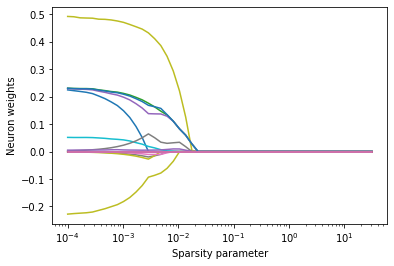

In [47]:
#PLOTTING - Neuron weights
for i in range(0,87):
        plt.plot(As,XlamMedian10k[:,i])
        plt.xscale('log')
        plt.xlabel('Sparsity parameter')
        plt.ylabel('Neuron weights')
        if abs(XlamMedian10k[lam,i])>2:
            if i==10:
                plt.text(As[lam+2],XlamMedian10k[lam,i]+2,Neurons[i])
            else:
                plt.text(As[lam],XlamMedian10k[lam,i],Neurons[i])
plt.show()

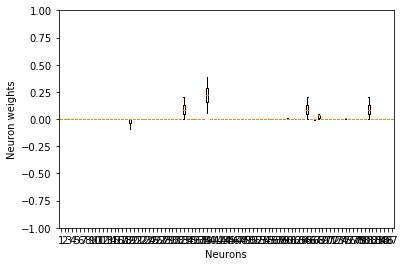

In [51]:
#PLOTTING - 10k Solutions box plot
data=LX10k[lam]
box = plt.boxplot(data, notch=False, patch_artist=False, whis=[5,95],showfliers=False)
plt.ylim([-1, 1])
plt.xlabel('Neurons')
plt.ylabel('Neuron weights')

for i in range(0,87):
    if abs(XlamMedian10k[lam,i])>2:
        plt.text(i+2,XlamMedian10k[lam,i],Neurons[i])
plt.show()

LX10klam = LX10k[lam]
scipy.io.savemat('Exitsolution2.mat', mdict={'LX10k': LX10k})
scipy.io.savemat('Exittestsolutionerror2.mat', mdict={'Error': L2norm10kMean})